# Adaptive PMC ABC
This example shows you how to perform adaptive PMC ABC on a time series from the stochastic degradation model.


In [1]:
import pints
import pints.toy as toy
import pints.plot
import pints.toy.stochastic
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.stochastic.DegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 100)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.0], [0.3])


# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

## Fit using Rejection ABC

In [2]:
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(500)

# set p_acc_min
abc.sampler().set_p_acc_min(0.2)

# set target number of samples
abc.set_nr_samples(1000)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
until 500
loop i=0
loop i=1
loop i=2
loop i=3
loop i=4
loop i=5
loop i=6
loop i=7
loop i=8
loop i=9
loop i=10
loop i=11
loop i=12
loop i=13
loop i=14
loop i=15
loop i=16
loop i=17
loop i=18
loop i=19
loop i=20
loop i=21
loop i=22
loop i=23
loop i=24
loop i=25
loop i=26
loop i=27
loop i=28
loop i=29
loop i=30
loop i=31
loop i=32
loop i=33
loop i=34
loop i=35
loop i=36
loop i=37
loop i=38
loop i=39
loop i=40
loop i=41
loop i=42
loop i=43
loop i=44
loop i=45
loop i=46
loop i=47
loop i=48
loop i=49
loop i=50
loop i=51
loop i=52
loop i=53
loop i=54
loop i=55
loop i=56
loop i=57
loop i=58
loop i=59
loop i=60
loop i=61
loop i=62
loop i=63
loop i=64
loop i=65
loop i=66
loop i=67
loop i=68
loop i=69
loop i=70
loop i=71
loop i=72
loop i=73
loop i=74
loop i=75
loop i=76
loop i=77
loop i=78
loop i=79
loop i=80
loop i=81
loop i=82
loop i=83
loop i=84
loop i=85
loop i=86
loop i=87
loop i=88
loop i=89
loop i=90
loop i=91
loop i=92
loop i=9

## Plot approximate posterior vs actual parameter value

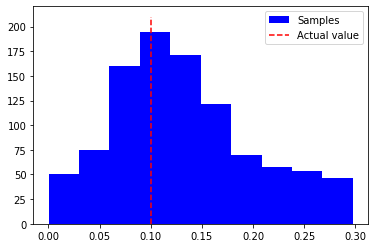

In [4]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=210, label="Actual value", color="red")
plt.legend()
plt.show()

# Testing components

In [14]:
def emp_var(ws, ths):
    """ Computes the weighted empirical variance of self._theta. """
    # print("ths="+str(ths))
    # print("ws="+str(ws))
    # Compute weighted mean
    _dim = len(ths[0])
    w_sum = sum(ws)
    w_mean = np.zeros(len(ths[0]))
    print("w_mean="+str(w_mean))
    for i in range(len(ths)):
        w_mean = w_mean + ws[i] * ths[i]
    
    w_mean /= w_sum

    print("w_mean="+str(w_mean))
    
    # Compute the sum of the weights
    w_sum = 0.0
    for i in range(len(ths)):
        w_sum = w_sum + ws[i]
    # Compute sum of the squared weights
    w_sq_sum = 0.0
    for i in range(len(ths)):
        w_sq_sum = w_sq_sum + (ws[i] ** 2)
    # Compute the non-corrected variance estimation
    n_V = 0.0
    partial_mat = np.zeros((_dim, _dim))
    for i in range(len(ths)):
        diff = ths[i] - w_mean
        for j in range(_dim):
            for k in range(_dim):
                partial_mat[j][k] = diff[j] * diff[k]
        n_V = n_V + ws[i] * partial_mat
        
    # Add correction term
    if w_sum ** 2 == w_sq_sum:
        print("1e-20 hit")
        e_var = (w_sum ** 2) / 1e-20 * n_V
    else:
        e_var = ((w_sum ** 2) / ((w_sum ** 2) - w_sq_sum)) * n_V
    
    if(e_var[0][0] > 10):
        print("e_var ="+str(e_var)+"weights="+str(ws)+", thetas="+str(ths))
    return e_var

In [16]:
ths = np.array([[1], [2]])
ws = np.array([1, 2])

print(len(ths[0]))
w_s = np.zeros(len(ths[0]))
print("ws="+str(w_s))

emp_var(ws, ths)

1
ws=[0.]
w_mean=[0.]
w_mean=[1.66666667]


array([[1.5]])